##### Clustering des billetins de l'année 1960

In [63]:
import requests

In [64]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [65]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [66]:
data_path = "../data/txt/"

In [67]:
DECADE = '1960'

In [68]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [69]:
files[:20]

['Bxl_1960_Tome_II1_Part_1.txt',
 'Bxl_1960_Tome_II1_Part_2.txt',
 'Bxl_1960_Tome_II1_Part_3.txt',
 'Bxl_1960_Tome_II1_Part_4.txt',
 'Bxl_1960_Tome_II1_Part_5.txt',
 'Bxl_1960_Tome_II1_Part_6.txt',
 'Bxl_1960_Tome_II1_Part_7.txt',
 'Bxl_1960_Tome_II1_Part_8.txt',
 'Bxl_1960_Tome_II2_Part_1.txt',
 'Bxl_1960_Tome_II2_Part_2.txt',
 'Bxl_1960_Tome_II2_Part_3.txt',
 'Bxl_1960_Tome_II2_Part_4.txt',
 'Bxl_1960_Tome_II2_Part_5.txt',
 'Bxl_1960_Tome_II2_Part_6.txt',
 'Bxl_1960_Tome_II2_Part_7.txt',
 'Bxl_1960_Tome_II2_Part_8.txt',
 'Bxl_1960_Tome_II2_Part_9.txt',
 'Bxl_1960_Tome_I_Part_1.txt',
 'Bxl_1960_Tome_I_Part_10.txt',
 'Bxl_1960_Tome_I_Part_11.txt']

In [70]:
texts = [open(data_path + f).read() for f in files]

In [71]:
# Exemple de textes
texts[0][:600]

'PUBLICATION\n\nPERIODIQUE\n\nVILLE DE BRUXELLES\n\nAnnée 1960\n\nBULLETIN\nCOMMUNAL\nTOME II "\n_u\n\nImpr. H . 6 M . S C H A U M A N S\nSociété\n\nAnonyme\n\nParvis Saint-Gilles, 41\nBruxelles\n1960\n\n\x0c\x0cN" 14\n\nCOMPTE\n\nR E N D U D E L A S E A N C E D U 1"\' A O U T\n\nVILLE\n\nDE\n\n1960\n\nBRUXELLES\n\nBULLETIN\n\nCOMMUNAL\n\n(Publication\n\npériodique)\n\nA n n é e 1960\n\nCONSEIL\n\nS é a n c e du\n\nPRESIDENCE\n\nCOMMUNAL\n\n1\n\ner\n\naoût\n\nDE M .\n\n1960.\n\nCOOREMANS,\n\nBourgmestre.\n\nSOMMAIRE :\nPages\n1.\n\n2.\n\n3.\n\n4.\n\nEvénements tragiques du Congo. — Vote d\'un crédit extraordinaire en faveur des rapatriéa du Congo . . . . . .\n\n5\n\nSports. — Avant-'

In [72]:
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

In [73]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

In [74]:
%time tfidf_vectors = vectorizer.fit_transform(texts)

CPU times: user 1min 17s, sys: 3.4 s, total: 1min 21s
Wall time: 1min 21s


In [75]:
tfidf_vectors

<420x6466 sparse matrix of type '<class 'numpy.float64'>'
	with 574279 stored elements in Compressed Sparse Row format>

In [76]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

+considérant    0.300647
fer             0.228639
curage          0.207466
dma             0.153796
art             0.147675
                  ...   
engagé          0.000000
engager         0.000000
engagements     0.000000
engage          0.000000
™               0.000000
Length: 6466, dtype: float64

In [77]:
cosine([1, 2, 3], [1, 2, 3])

0

In [78]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [79]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

In [80]:
tfidf_array = tfidf_vectors.toarray()

In [81]:
tfidf_array[0]

array([0.        , 0.        , 0.02359086, ..., 0.01398357, 0.00888238,
       0.        ])

In [82]:
tfidf_array[1]

array([0.        , 0.        , 0.00633553, ..., 0.01408279, 0.        ,
       0.        ])

In [83]:
cosine(tfidf_array[0], tfidf_array[1])

0.45731736240865606

In [84]:
N_CLUSTERS = 15

In [85]:
km_model = KMeans(n_clusters=N_CLUSTERS)

In [86]:
clusters = km_model.fit_predict(tfidf_vectors)

In [87]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [88]:
pprint(dict(clustering))

{0: ['Bxl_1960_Tome_II1_Part_3.txt',
     'Bxl_1960_Tome_II2_Part_6.txt',
     'Bxl_1963_Tome_II2_Part_9.txt',
     'Bxl_1963_Tome_RptAn_Part_2.txt',
     'Bxl_1963_Tome_RptAn_Part_8.txt',
     'Bxl_1964_Tome_II1_Part_11.txt',
     'Bxl_1964_Tome_II1_Part_4.txt',
     'Bxl_1964_Tome_II1_Part_5.txt',
     'Bxl_1964_Tome_II1_Part_7.txt',
     'Bxl_1964_Tome_II2_Part_6.txt',
     'Bxl_1964_Tome_II2_Part_8.txt',
     'Bxl_1964_Tome_I_Part_11.txt',
     'Bxl_1964_Tome_I_Part_12.txt',
     'Bxl_1964_Tome_I_Part_4.txt',
     'Bxl_1965_Tome_II1_Part_1.txt',
     'Bxl_1965_Tome_II1_Part_4.txt',
     'Bxl_1965_Tome_II1_Part_7.txt',
     'Bxl_1965_Tome_II1_Part_9.txt',
     'Bxl_1965_Tome_II2_Part_12.txt',
     'Bxl_1965_Tome_I_Part_1.txt',
     'Bxl_1965_Tome_I_Part_12.txt',
     'Bxl_1965_Tome_I_Part_2.txt',
     'Bxl_1965_Tome_I_Part_3.txt',
     'Bxl_1965_Tome_I_Part_4.txt',
     'Bxl_1965_Tome_I_Part_6.txt',
     'Bxl_1966_Tome_I1_Part_5.txt',
     'Bxl_1966_Tome_I1_Part_7.txt',
     'Bxl_19

In [89]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [90]:
reduced_vectors[:12]

array([[-0.38270966, -0.30286696],
       [-0.46021328, -0.36440005],
       [-0.04160243,  0.0774633 ],
       [-0.42760853, -0.33991019],
       [-0.2379418 , -0.10347185],
       [-0.10847638, -0.04634006],
       [-0.26295808, -0.1985542 ],
       [-0.30964975, -0.15191113],
       [-0.08372331, -0.01568695],
       [-0.09278885,  0.02180836],
       [-0.14441361, -0.00681412],
       [-0.14286115, -0.05765109]])

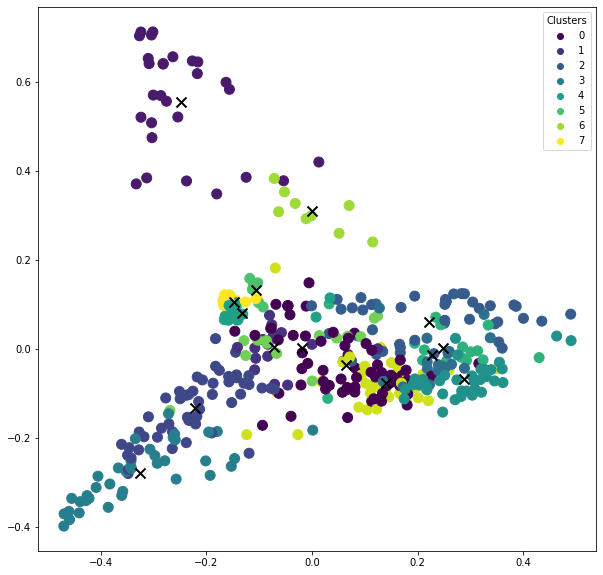

In [91]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

#### Phrases segmentées

In [92]:
import os
import sys
import nltk
from nltk.tokenize import sent_tokenize

In [93]:
infile = "../data/all.txt"
outfile = "../data/sents.txt"

In [96]:
LIMIT = None

In [97]:
with open(outfile, 'w', encoding="utf-8") as output:
    with open(infile, encoding="utf-8", errors="backslashreplace") as f:
        content = f.readlines()
        content = content[:LIMIT] if LIMIT is not None else content
        n_lines = len(content)
        for i, line in enumerate(content):
            if i % 10000 == 0:
                print(f'processing line {i}/{n_lines}')
            sentences = sent_tokenize(line)
            for sent in sentences:
                output.write(sent + "\n")
print("Done")

processing line 0/447060
processing line 10000/447060
processing line 20000/447060
processing line 30000/447060
processing line 40000/447060
processing line 50000/447060
processing line 60000/447060
processing line 70000/447060
processing line 80000/447060
processing line 90000/447060
processing line 100000/447060
processing line 110000/447060
processing line 120000/447060
processing line 130000/447060
processing line 140000/447060
processing line 150000/447060
processing line 160000/447060
processing line 170000/447060
processing line 180000/447060
processing line 190000/447060
processing line 200000/447060
processing line 210000/447060
processing line 220000/447060
processing line 230000/447060
processing line 240000/447060
processing line 250000/447060
processing line 260000/447060
processing line 270000/447060
processing line 280000/447060
processing line 290000/447060
processing line 300000/447060
processing line 310000/447060
processing line 320000/447060
processing line 330000/4

#### Modèle Word Embeging

In [98]:
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

In [99]:
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [100]:
infile = f"../data/sents.txt"
sentences = MySentences(infile)

sentences = [sentence for sentence in sentences]

In [101]:
bigram_phrases = Phrases(sentences)

In [102]:
type(bigram_phrases.vocab)

dict

In [103]:
len(bigram_phrases.vocab.keys())

514921

In [146]:
key_ = list(bigram_phrases.vocab.keys())[300]
print(key_)

presidence_de


In [147]:
bigram_phrases.vocab[key_]

199

In [148]:
%time bigram_phrases[sentences[80]]

CPU times: user 296 µs, sys: 48 µs, total: 344 µs
Wall time: 359 µs


['il',
 'est',
 'donne_communication',
 'd',
 "'",
 'une',
 'lettre',
 'demm',
 '.',
 'donies',
 ',',
 'commandant',
 'le',
 'corps',
 'des',
 'pompiers',
 ',',
 'et',
 'adolphe',
 'bartels',
 ',',
 'accompagnant',
 'l',
 "'",
 'envoi',
 'de',
 'leur',
 'brochure',
 'relative',
 'a',
 'un',
 'plan',
 'd',
 "'",
 'assurance']

In [107]:
bigram_phraser = Phraser(phrases_model=bigram_phrases)

In [149]:
%time bigram_phraser[sentences[80]]

CPU times: user 76 µs, sys: 12 µs, total: 88 µs
Wall time: 91.6 µs


['il',
 'est',
 'donne_communication',
 'd',
 "'",
 'une',
 'lettre',
 'demm',
 '.',
 'donies',
 ',',
 'commandant',
 'le',
 'corps',
 'des',
 'pompiers',
 ',',
 'et',
 'adolphe',
 'bartels',
 ',',
 'accompagnant',
 'l',
 "'",
 'envoi',
 'de',
 'leur',
 'brochure',
 'relative',
 'a',
 'un',
 'plan',
 'd',
 "'",
 'assurance']

In [150]:
trigram_phrases = Phrases(bigram_phraser[sentences])

In [151]:
trigram_phraser = Phraser(phrases_model=trigram_phrases)

In [152]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [153]:
print(corpus[:200])

[['v', 'i', 'l', 'l', 'e', 'de'], ['bruxelles'], ['bulletin', 'ires', '8eanas'], ['dl', '!'], ['conseil'], ['communal'], ['annee'], ['1847', '.'], ['au'], ['ville', 'de', 'b', 'r', 'u', 'x', 'e', 'l', 'l', 'e', 's', '.'], ['bulletin'], ['conseil'], ['aes'], ['seances'], ['communal', '.'], ['annee'], ['1847', '.'], ['bruxelles', ','], ['imprimerie'], ['d', 'e', 'j', '.'], ['h', '.', 'b', 'r', 'i', 'a', 'r', 'd', ','], ['rite', 'n', 'e', 'u', 'v', 'e', ',', '3', '1', ',', 'faubourg', 'de', 'n', 'a', 'm', 'u', 'r', ','], ['1', '84', '8'], ['de', '!'], ['du', 'consei'], ['dibi'], ['e', '.', '-', 'communication'], ['conclusions', 'de', 'la', 'section', 'des'], ['du', 'nouvel_hospice', 'pour', 'les', 'av'], ['enraisonde', 'l', "'", 'absence', '&'], ['maladie', '.', 'le', 'conseil', 'ajourne'], ['leurs', 'de', 'pierre', 'el', 'marchai'], ['cles', 'des', 'taxes', 'communale', "'"], ['bieniaance', 'eldeseianv'], ['il', 'est', 'donne', 'communie', ';'], ['mandant', 'le', 'o', 'p', 'fa'], ['gnant

In [154]:
%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=10, # La taille du "contexte", ici 10 mots avant et après le mot observé
    min_count=8, # On ignore les mots qui n'apparaissent pas au moins 8 fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descende de gradient, aka. epochs.
)

CPU times: user 28.1 s, sys: 1.27 s, total: 29.3 s
Wall time: 14.4 s


In [155]:
outfile = f"../data/bulletins.model"
model.save(outfile)

In [156]:
model = Word2Vec.load("../data/bulletins.model")

In [157]:
model.wv["communal"]

array([-0.07121358, -0.74078065,  0.04386743, -0.96170455,  0.33165693,
        0.9718457 ,  0.53427   , -0.81537825, -0.18367888,  0.5603393 ,
       -0.04243317,  0.39534187, -0.6431899 , -0.17013489, -0.62906593,
       -0.47471893,  0.19450623,  1.1592127 ,  0.2673642 , -0.09526157,
       -0.4521299 , -0.6396313 ,  0.16289917,  0.79392225, -0.3236809 ,
       -0.59905463, -0.58391976,  0.29890564, -0.04670095,  0.16989094,
       -0.85520023,  0.4054909 ], dtype=float32)

In [158]:
model.wv.similarity("commune", "communal")

0.37746972

In [159]:
model.wv.similarity("conseil", "conseiller")

0.5697751

In [160]:
model.wv.similarity("administration", "communal")

0.34015968

In [161]:
model.wv.most_similar("financier", topn=8)

[('je_prends', 0.8971489667892456),
 ('couteuse', 0.8789119124412537),
 ('resolument', 0.8739970922470093),
 ('excellent', 0.872668981552124),
 ('rectifier', 0.8705666661262512),
 ('mieux_vaudrait', 0.8702496290206909),
 ('triste', 0.8694406151771545),
 ('laissons', 0.865371823310852)]

In [162]:
model.wv.most_similar("communal", topn=20)

[('conseil_communal', 0.7937808632850647),
 ('instance', 0.7829113602638245),
 ('inseree', 0.7674962282180786),
 ('conseil_provincial', 0.7651901245117188),
 ('libelle', 0.7608800530433655),
 ('consulter_avec', 0.7427012324333191),
 ('depose', 0.7337926030158997),
 ('procesverbal', 0.7247693538665771),
 ('27_octobre', 0.7236866354942322),
 ('beaulieu', 0.7211461067199707),
 ('budget_communal', 0.7190577387809753),
 ('brabant', 0.7169389724731445),
 ('approuve', 0.7165088057518005),
 ('college_echevinal', 0.7148104310035706),
 ('dresse', 0.7138791680335999),
 ('testateur', 0.7095401883125305),
 ('pourvoi', 0.7094168066978455),
 ('le_conseil_communal', 0.7090582847595215),
 ('provincial', 0.7070620059967041),
 ('contrat', 0.7057364583015442)]

In [163]:
model.wv.most_similar("ville", topn=30)

[('commune', 0.8352209329605103),
 ('province', 0.7021770477294922),
 ('capitale', 0.6983414888381958),
 ('societe', 0.6737650036811829),
 ('hennessy', 0.6580584049224854),
 ('restauration', 0.6540626883506775),
 ('population', 0.6362079381942749),
 ('faculte', 0.6347213983535767),
 ('societe_generale', 0.6279077529907227),
 ('belgique', 0.6249281764030457),
 ('garnison', 0.619204580783844),
 ('tour', 0.6167994141578674),
 ('situation', 0.6162922382354736),
 ('banlieue', 0.6136622428894043),
 ('condition', 0.6127732396125793),
 ('duree', 0.6115177273750305),
 ('caisse_communale', 0.606036365032196),
 ('prosperite', 0.5964291095733643),
 ('salle', 0.5928523540496826),
 ('ferme', 0.5899807214736938),
 ('compagnie', 0.5899489521980286),
 ('messageries', 0.57857745885849),
 ('journee', 0.5779379606246948),
 ('reunion', 0.5776194930076599),
 ('chambre', 0.5758602619171143),
 ('souscription', 0.5721426010131836),
 ('horloge', 0.5698678493499756),
 ('disposition', 0.5667033791542053),
 ('bour